In [1]:
import pandas as pd 
import process
import numpy as np 

# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

In [9]:
import warnings 


warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

lookback_window = [0, 250]
number_of_clusters = 20
sigma = 10e-1
clustering_method = 'signed_laplacian' 
number_of_repetition = 10
evaluation_window = 10
eta=0.01
PnL = []
overall_return = pd.DataFrame()
portfolio_value=[1] #we start with a value of 1, the list contain : the porfolio value at the start of each evaluation period

for i in range(1, 30):

    consolidated_W = process.consolidated_W(number_of_repetitions=number_of_repetition, lookback_window=lookback_window, df_cleaned=df_cleaned, number_of_clusters=number_of_clusters, sigma=sigma, evaluation_window=evaluation_window, eta=eta, clustering_method=clustering_method)

    portfolio_return = process.portfolio_returns(evaluation_window=evaluation_window, df_cleaned=df_cleaned, lookback_window=lookback_window, consolidated_W=consolidated_W)

    overall_return = pd.concat([overall_return, portfolio_return])

    lookback_window = [lookback_window[0] + evaluation_window*i, lookback_window[1] + evaluation_window*i]

    PnL = np.concatenate((PnL, np.reshape(np.cumprod(1 + portfolio_return)*portfolio_value[-1] - portfolio_value[-1], (evaluation_window,))))## car on réinvestit immédiatement après
    
    portfolio_value.append(portfolio_value[-1]+PnL[-1])

    print(portfolio_value[-1])
    
    print(f'step{i}')

*
1.0371248464689873
**
1.0438328761293063
***
1.0400093886076374
****
1.039924312143989
*****
1.0389030770021934
******
1.0544582223389973
*******
1.0559712686477067
********
1.0608008278672822
*********
1.0540491192699013
**********
1.062504511345776
***********
1.0660343265413321
************
1.0755641308324946
*************
1.0729389863158687
**************
1.0804491116409936
***************
1.0385971547056663
****************
1.0405168650618997
*****************
1.0297013881947397
******************
1.0353292500638203
*******************
1.0224139806758192
********************
1.022183049468015
*********************
1.0353326070825524
**********************
1.0477137159172434
***********************
1.039869450704323
************************
1.032244460528995
*************************
1.023260895378237
**************************
1.0308705123914323
***************************
1.0331574561964532
****************************
1.0369583226679207
*****************************
1.02084931

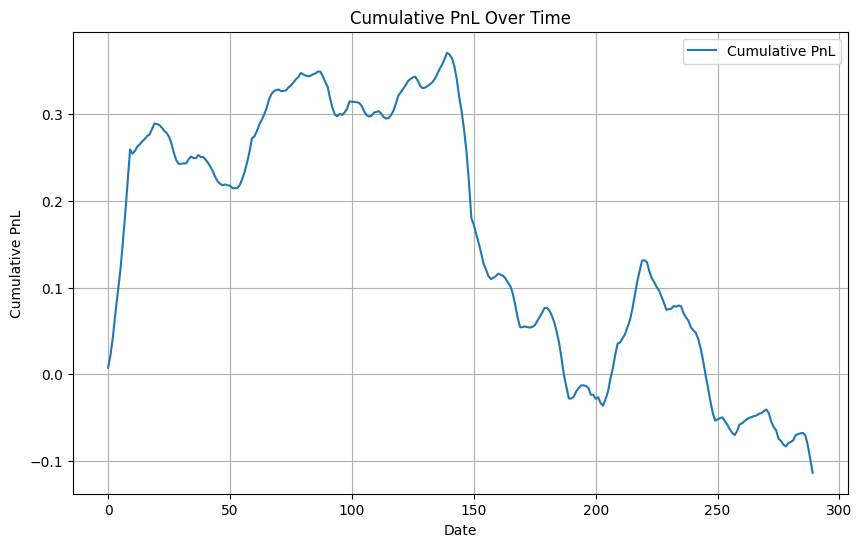

In [13]:
import matplotlib.pyplot as plt


# Tracez le PnL cumulatif
plt.figure(figsize=(10, 6))
plt.plot(PnL.cumsum(), label='Cumulative PnL')
plt.title('Cumulative PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.legend()
plt.grid(True)
plt.show()


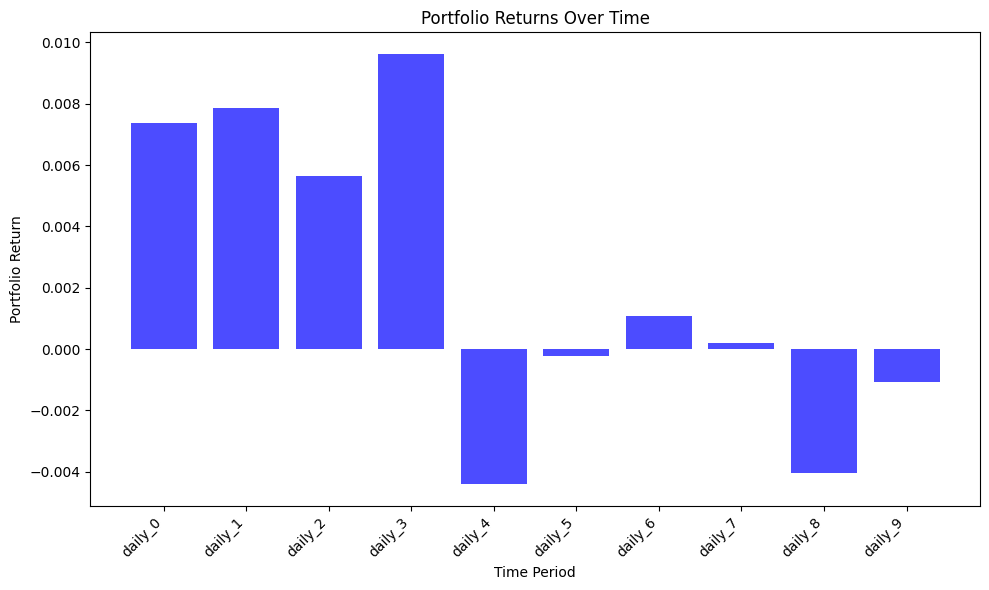

In [8]:
process.bar_plot_PnL(PnL)
